<a href="https://colab.research.google.com/github/Mghane/My-Py-Docs/blob/master/Pro_2_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pro_2 Regression with synthetic dataset
### Mehdi Ghane

In [18]:
# import
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split 

In [ ]:
# Make the database
N = 1000
X1 = np.random.uniform(-3,3, N)
X2 = np.random.uniform(-3,3, N)
y = np.cos(2*X1) + np.cos(2*X2)

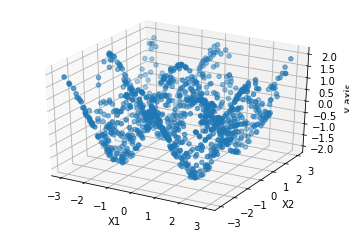

In [17]:
# plot data
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.set(xlabel='X1', ylabel='X2', zlabel='y axis')
ax.scatter(X1, X2, y)

In [33]:
# concatinate Xs
X = np.dstack((X1,X2))[0]
X.shape

(1000, 2)

In [32]:
# Split data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [90]:
# to reset the dense layer numbers if there are any already
from keras import backend as K
K.clear_session()

In [91]:
# set model
model = tf.keras.models.Sequential([
                            tf.keras.layers.Input(shape=(1000,2), batch_size=100),
                            tf.keras.layers.Dense(120, activation='relu'),
                            tf.keras.layers.Dense(1)
                          ])

In [92]:
# compile
EPOCHS = 100
lr = 0.01
decay_rate = lr / EPOCHS
momentum = 0.9
opt = tf.keras.optimizers.SGD(learning_rate=lr, decay = decay_rate, momentum= momentum) # to chose different lr
model.compile(optimizer=opt, loss='mse')

In [93]:
# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test) , epochs=EPOCHS)

Epoch 1/100
21/21 [==============================] - 0s 6ms/step - loss: 0.9576 - val_loss: 0.9513
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.8856 - val_loss: 0.8919
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.8931 - val_loss: 0.8667
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.8585 - val_loss: 0.8858
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.8336 - val_loss: 0.8196
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.8035 - val_loss: 0.8114
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.7948 - val_loss: 0.8808
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.8650 - val_loss: 0.8884
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.7957 - val_loss: 0.7733
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.7733 - val_loss: 0.7694
Epoch 11/

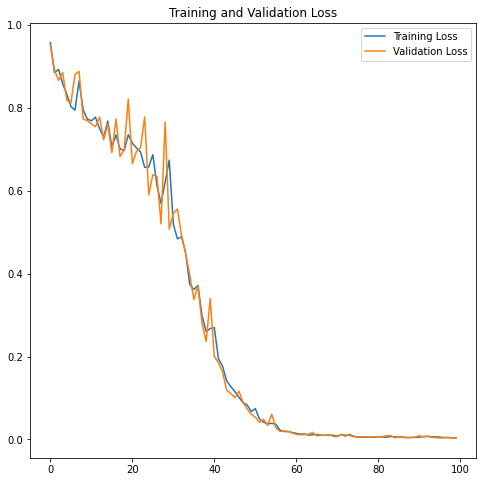

In [94]:
# plot the accuracy and loss for history data
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range=range(EPOCHS)

plt.figure(figsize=(8, 8))

plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [98]:
## prediction
y_pred = model.predict(X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


[Text(0, 0.5, 'Predicted y'), Text(0.5, 0, 'Actual')]

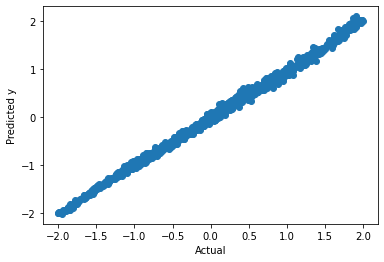

In [102]:
plt.scatter(y, y_pred)
ax = plt.axes()
ax.set(xlabel='Actual', ylabel='Predicted y')

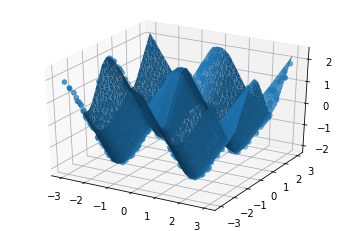

In [104]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, y)

# surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

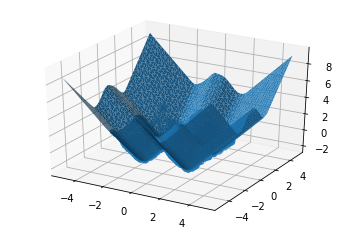

In [105]:
# Can it extrapolate?
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, y)

# surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

#### Apperantly it cannot extrapolate. Because ANN does not have aperiodic activation function to predict the frequent upward and downward trends. So, it simply extends the current trend exactly as it is. 

## End of document